In [1]:
import numpy as np 
import pandas as pd

In [2]:
base_path = "data/output/"

In [3]:
nedbit_path = "nedbit_features.csv"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4113,1,0.905257,2.281636e+03,0.352461,0.227665
1,cg00755661_CTTNBP2NL,1,4077,1,0.894339,2.250929e+03,0.410495,0.227579
2,cg01343097_OR2M1P,1,3916,1,0.676167,2.697290e+03,1.546465,0.227793
3,cg01833436_SDCCAG8,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
4,cg01833436_AKT3,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
...,...,...,...,...,...,...,...,...
11751,cg01909024_PAQR7,0,1,3,2.982511,1.573376e+02,0.000007,0.000155
11752,cg02073054_IL19,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11753,cg02073054_IL19.1,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11754,cg05262634_CDCA8,0,2,3,2.987049,1.558967e+02,0.000007,0.000422


In [4]:
df_test_probe_genes = pd.read_csv("../graph_neural_networks/data/output/test_probe_genes.csv", sep="\t")
probe_gene_list = df_test_probe_genes.iloc[:, 0].tolist()
df_test_probe_genes, len(probe_gene_list), probe_gene_list[:5]

(                       0
 0       cg06151744_P2RX5
 1        cg04258457_ERN1
 2       cg01949993_LAMC2
 3      cg02385474_PCNXL2
 4     cg03041808_EDARADD
 ...                  ...
 2699    cg04423622_KIF17
 2700    cg00251536_KIF2C
 2701  cg07139449_SIPA1L1
 2702    cg02341811_PYGO2
 2703    cg00257659_LAMB3
 
 [2704 rows x 1 columns],
 2704,
 ['cg06151744_P2RX5',
  'cg04258457_ERN1',
  'cg01949993_LAMC2',
  'cg02385474_PCNXL2',
  'cg03041808_EDARADD'])

In [5]:
df_nebit_features_test = df_nebit_features[df_nebit_features["name"].isin(probe_gene_list)]
df_nebit_features_test.reset_index(drop=True, inplace=True)
df_nebit_features_test

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4113,1,0.905257,2281.6360,0.352461,0.227665
1,cg03138364_PBX1,1,4234,1,0.551498,3209.4320,2.213691,0.227113
2,cg05365320_KIF21B,1,4324,1,0.906095,2283.7480,0.355691,0.227311
3,cg07344172_KIF21B,1,4330,1,0.906136,2283.1860,0.355144,0.227333
4,cg08732375_IGSF3,1,4092,1,0.596045,2970.6150,1.974394,0.227719
...,...,...,...,...,...,...,...,...
2699,cg01778345_GDAP2,0,5,3,2.990594,158.0601,0.000015,0.000882
2700,cg02642404_FAM36A,0,11,3,2.986049,157.9704,0.000049,0.002790
2701,cg00581848_GPR157,0,5,3,2.987783,162.6307,0.000027,0.001714
2702,cg05262634_CDCA8,0,2,3,2.987049,155.8967,0.000007,0.000422


In [6]:
probe_gene_list_ordered = df_nebit_features_test["name"].tolist()
len(probe_gene_list_ordered), probe_gene_list_ordered[:5]

(2704,
 ['cg00394221_FCRL1',
  'cg03138364_PBX1',
  'cg05365320_KIF21B',
  'cg07344172_KIF21B',
  'cg08732375_IGSF3'])

In [7]:
nebit_features = df_nebit_features_test.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,2281.6360,0.352461,0.227665
1,1,0.551498,3209.4320,2.213691,0.227113
2,1,0.906095,2283.7480,0.355691,0.227311
3,1,0.906136,2283.1860,0.355144,0.227333
4,1,0.596045,2970.6150,1.974394,0.227719
...,...,...,...,...,...
2699,3,2.990594,158.0601,0.000015,0.000882
2700,3,2.986049,157.9704,0.000049,0.002790
2701,3,2.987783,162.6307,0.000027,0.001714
2702,3,2.987049,155.8967,0.000007,0.000422


In [8]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

2704 (2704, 1)


array([[ 0.71491562],
       [ 2.09932726],
       [ 0.71806704],
       ...,
       [-2.44696008],
       [-2.45700822],
       [-2.44692889]])

In [9]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,0.714916,0.352461,0.227665
1,1,0.551498,2.099327,2.213691,0.227113
2,1,0.906095,0.718067,0.355691,0.227311
3,1,0.906136,0.717228,0.355144,0.227333
4,1,0.596045,1.742976,1.974394,0.227719
...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882
2700,3,2.986049,-2.453914,0.000049,0.002790
2701,3,2.987783,-2.446960,0.000027,0.001714
2702,3,2.987049,-2.457008,0.000007,0.000422


In [10]:
output_gene_ranking_path = "out_gene_rankings.csv"
df_apu_labels = pd.read_csv(base_path + output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg00394221_FCRL1,0.832421,1
1,cg00755661_CTTNBP2NL,0.831663,1
2,cg01343097_OR2M1P,0.835457,1
3,cg01833436_SDCCAG8,0.834424,1
4,cg01833436_AKT3,0.834424,1
...,...,...,...
11751,cg01909024_PAQR7,-0.552101,5
11752,cg02073054_IL19,0.810015,1
11753,cg02073054_IL19.1,0.810015,1
11754,cg05262634_CDCA8,-0.552093,5


In [11]:
l_name = list()
l_labels = list()
for i, item in df_nebit_features_test.iterrows():
    r_val = item.values
    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]
    if len(matched_row.index) > 0:
        l_name.append(r_val[0])
        l_labels.append(matched_row.values[0][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg03138364_PBX1,1
2,cg05365320_KIF21B,1
3,cg07344172_KIF21B,1
4,cg08732375_IGSF3,1
...,...,...
2699,cg01778345_GDAP2,5
2700,cg02642404_FAM36A,5
2701,cg00581848_GPR157,5
2702,cg05262634_CDCA8,5


In [12]:
labels = df_labels["labels"].tolist()

In [13]:
import umap
#from umap import umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt

n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.99 #0.3
metric='correlation'

#embeddings = umap.UMAP(n_neighbors=n_neighbors,
#                       min_dist=min_dist,
#                       metric='correlation').fit_transform(nebit_features)
embeddings = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='correlation').fit_transform(nebit_features)

#embeddings = umap.UMAP(metric='correlation').fit_transform(nebit_features)

/home/ubuntu/data/miniconda3/envs/nanodiag_biomarker/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-19 17:11:29.301107: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-19 17:11:29.356861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 17:11:29.356900: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 17:11:29.359693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to regist

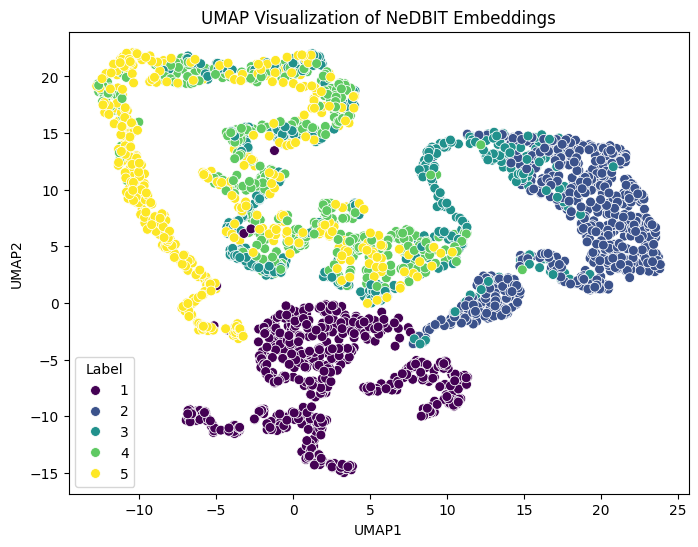

In [14]:
# Create a DataFrame with UMAP components and labels
data = {"UMAP1": embeddings[:, 0], "UMAP2": embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=1.0)
#, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT Embeddings")
plt.savefig(base_path + "umap_NeDBIT_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [15]:
df_merged_signals = pd.read_csv("../process_illumina_arrays/data/output/merged_signals.csv", sep="\t", engine="c")
df_merged_signals

,cg23954847_TFE3,cg00000957_NPHP4,cg00001349_MAEL,cg00001364_PROX1,cg00001446_ELOVL1,cg00001534_FAF1,cg00001583_NR5A2,cg00002028_PINK1,cg00002028_PINK1.1,cg00002593_TAS1R3,...,ch.22.533187F_HMOX1,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10
0,0.864672,0.919098,0.931214,0.825985,0.841873,0.905513,0.902962,0.052570,0.052570,0.831665,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
1,0.732438,0.884181,0.862162,0.758616,0.782469,0.853061,0.324640,0.091551,0.091551,0.797655,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
2,0.870964,0.896988,0.917439,0.798168,0.788342,0.883873,0.064378,0.041799,0.041799,0.831371,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
3,0.770894,0.896535,0.923548,0.781703,0.810133,0.898413,0.146580,0.061871,0.061871,0.788763,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
4,0.793325,0.900545,0.890331,0.753394,0.816442,0.874389,0.283989,0.044948,0.044948,0.789155,...,0.029399,0.112743,0.047210,0.025311,0.120706,0.158879,0.033180,0.039391,0.030883,0.108496
5,0.771238,0.881966,0.885884,0.706935,0.789394,0.844779,0.052274,0.058234,0.058234,0.768430,...,0.050518,0.144294,0.078152,0.046610,0.170648,0.172923,0.054839,0.068701,0.098243,0.220538
6,0.818622,0.858326,0.837925,0.785126,0.798059,0.887452,0.191977,0.062295,0.062295,0.477000,...,0.068426,0.181990,0.159486,0.043905,0.184506,0.147676,0.056958,0.065455,0.091866,0.168706
7,0.719042,0.888057,0.864124,0.758313,0.781905,0.884818,0.390451,0.088711,0.088711,0.825365,...,0.068621,0.154173,0.102731,0.059434,0.186476,0.138332,0.082228,0.073743,0.098911,0.185174
8,0.775340,0.892561,0.908382,0.771167,0.835124,0.877090,0.669288,0.088306,0.088306,0.788113,...,0.052823,0.139850,0.063330,0.047713,0.147007,0.168616,0.062604,0.070394,0.072000,0.148210
9,0.430085,0.882614,0.871273,0.797262,0.808716,0.878163,0.145391,0.072168,0.072168,0.823876,...,0.070245,0.171744,0.099462,0.066413,0.207633,0.188526,0.064079,0.077805,0.120990,0.165222


In [16]:
df_merged_signals["cg01550473_HSPA6"]

0     0.170122
1     0.234754
2     0.127171
3     0.241289
4     0.149802
5     0.237964
6     0.182503
7     0.269738
8     0.252819
9     0.291957
10    0.194857
11    0.167656
12    0.290617
13    0.211648
14    0.098939
15    0.146306
16    0.254082
17    0.150761
18    0.232884
19    0.134681
20    0.246714
21    0.139002
22    0.269388
23    0.136340
24    0.284338
25    0.264882
26    0.296536
27    0.172584
28    0.168938
29    0.227908
30    0.181529
31    0.093439
32    0.162609
33    0.263323
Name: cg01550473_HSPA6, dtype: float64

In [17]:
feature_names = df_labels["feature_name"].tolist()

In [18]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg00394221_FCRL1,cg03138364_PBX1,cg05365320_KIF21B,cg07344172_KIF21B,cg08732375_IGSF3,cg10500219_MED8,cg10785099_KIF21B,cg12857074_KIF21B,cg17240157_PBX1,cg17876641_KIF21B,...,cg01873305_MRPS15,cg00649606_SLC19A2,cg00777895_SRP9,cg19772317_FANCM,cg03969070_STK40,cg01778345_GDAP2,cg02642404_FAM36A,cg00581848_GPR157,cg05262634_CDCA8,cg03524755_FAM73A
0,0.884223,0.794427,0.854060,0.883548,0.908273,0.811794,0.984450,0.798017,0.774234,0.822238,...,0.743802,0.338368,0.499055,0.082190,0.150310,0.828892,0.060620,0.109531,0.114019,0.652632
1,0.854487,0.737284,0.784603,0.837806,0.856551,0.714955,0.968724,0.685782,0.736658,0.749290,...,0.662043,0.327363,0.513337,0.072628,0.187409,0.433059,0.073630,0.100585,0.115849,0.673340
2,0.893978,0.786059,0.841955,0.893121,0.892464,0.659370,0.975738,0.780370,0.816740,0.814179,...,0.781706,0.327952,0.539838,0.052010,0.107705,0.071307,0.061032,0.112426,0.108110,0.664790
3,0.877296,0.751683,0.831785,0.878410,0.917480,0.711045,0.974421,0.738108,0.809655,0.775013,...,0.689753,0.343726,0.540066,0.082387,0.197413,0.469766,0.054784,0.164738,0.128333,0.619177
4,0.881579,0.739205,0.821238,0.874312,0.909598,0.757564,0.985892,0.697884,0.754403,0.734010,...,0.744069,0.328884,0.512826,0.049081,0.150834,0.447412,0.079514,0.102264,0.138480,0.630584
5,0.910560,0.738706,0.787695,0.869455,0.871968,0.670109,0.972633,0.718663,0.784075,0.770273,...,0.628410,0.335215,0.443950,0.060969,0.162949,0.670534,0.108485,0.109800,0.118957,0.638336
6,0.858944,0.777952,0.816858,0.879644,0.867753,0.733736,0.957147,0.727449,0.772563,0.787640,...,0.731505,0.335438,0.504610,0.035262,0.214853,0.788479,0.087466,0.089250,0.105784,0.705927
7,0.851166,0.758583,0.816591,0.886284,0.882735,0.784577,0.967040,0.698156,0.783202,0.741213,...,0.685484,0.334058,0.474879,0.049005,0.184074,0.089120,0.075425,0.098425,0.132962,0.622278
8,0.897877,0.706786,0.849428,0.865806,0.840987,0.729777,0.973070,0.735804,0.754818,0.797789,...,0.801460,0.333455,0.534614,0.045879,0.213423,0.514156,0.062101,0.116492,0.106625,0.676087
9,0.884387,0.785772,0.817566,0.850882,0.878348,0.689017,0.971051,0.772929,0.773562,0.788383,...,0.720843,0.328747,0.555848,0.061505,0.197292,0.209664,0.077052,0.135532,0.130550,0.668094


In [19]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
cg03138364_PBX1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,0.785772,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
cg05365320_KIF21B,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,0.817566,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
cg07344172_KIF21B,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,0.850882,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
cg08732375_IGSF3,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,0.878348,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg01778345_GDAP2,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,0.209664,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
cg02642404_FAM36A,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,0.077052,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
cg00581848_GPR157,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,0.135532,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
cg05262634_CDCA8,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [20]:
dnam_signals_transpose.to_csv(base_path + "dnam_signals_transpose_test.csv")

In [21]:
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,cg03138364_PBX1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,cg05365320_KIF21B,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,cg07344172_KIF21B,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,cg08732375_IGSF3,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,cg01778345_GDAP2,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,cg02642404_FAM36A,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,cg00581848_GPR157,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,cg05262634_CDCA8,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [22]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,0.785772,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,0.817566,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,0.850882,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,0.878348,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,0.209664,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,0.077052,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,0.135532,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [23]:
n_neighbors=35 #10 #10 #5
min_dist=0.999 #0.99 #0.99 #0.3
metric='correlation'

dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(dnam_features)

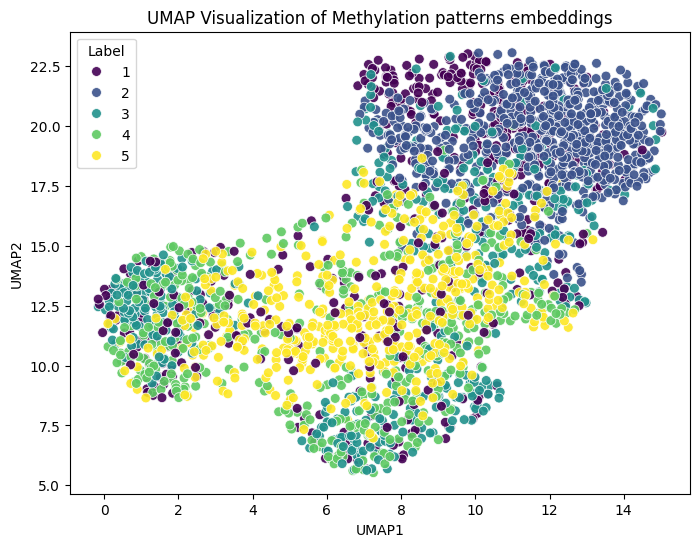

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": dnam_embeddings[:, 0], "UMAP2": dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of Methylation patterns embeddings")
plt.savefig(base_path + "umap_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [25]:
#nebit_features = nebit_features.reset_index()
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,0.714916,0.352461,0.227665
1,1,0.551498,2.099327,2.213691,0.227113
2,1,0.906095,0.718067,0.355691,0.227311
3,1,0.906136,0.717228,0.355144,0.227333
4,1,0.596045,1.742976,1.974394,0.227719
...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882
2700,3,2.986049,-2.453914,0.000049,0.002790
2701,3,2.987783,-2.446960,0.000027,0.001714
2702,3,2.987049,-2.457008,0.000007,0.000422


In [26]:
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.794427,0.737284,0.786059,0.751683,0.739205,0.738706,0.777952,0.758583,0.706786,0.785772,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,0.854060,0.784603,0.841955,0.831785,0.821238,0.787695,0.816858,0.816591,0.849428,0.817566,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,0.883548,0.837806,0.893121,0.878410,0.874312,0.869455,0.879644,0.886284,0.865806,0.850882,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,0.908273,0.856551,0.892464,0.917480,0.909598,0.871968,0.867753,0.882735,0.840987,0.878348,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.828892,0.433059,0.071307,0.469766,0.447412,0.670534,0.788479,0.089120,0.514156,0.209664,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,0.060620,0.073630,0.061032,0.054784,0.079514,0.108485,0.087466,0.075425,0.062101,0.077052,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,0.109531,0.100585,0.112426,0.164738,0.102264,0.109800,0.089250,0.098425,0.116492,0.135532,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [27]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = pd.concat([nebit_features, dnam_features], axis=1)
nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,1,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,0.739205,...,0.628306,0.450413,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270
2,1,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,0.821238,...,0.760538,0.757340,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851
3,1,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,0.874312,...,0.775059,0.732000,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880
4,1,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,0.909598,...,0.728625,0.667310,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,0.447412,...,0.076688,0.429151,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380
2700,3,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,0.079514,...,0.063279,0.079482,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288
2701,3,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,0.102264,...,0.123405,0.097586,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843
2702,3,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [28]:
n_neighbors=20 #20 #10 #5
min_dist=0.999 #0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_dnam_features)

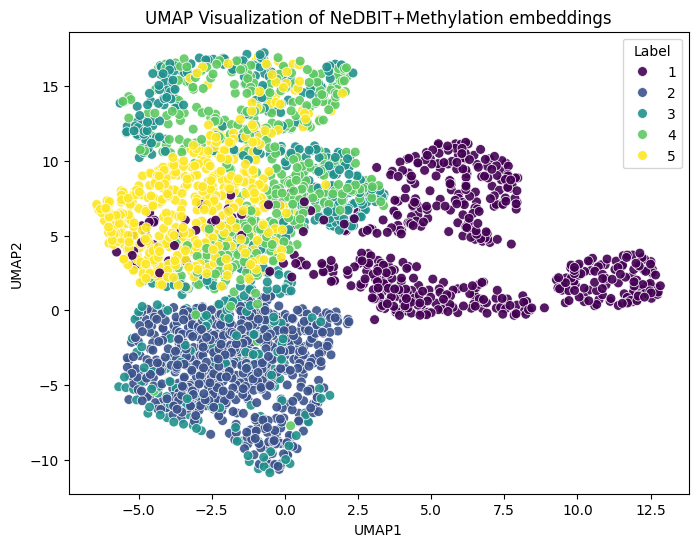

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a data frame with UMAP components and labels
data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation embeddings")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [30]:
df_nebit_dnam_features = nebit_dnam_features

In [31]:
df_nebit_dnam_features["labels"] = labels
df_nebit_dnam_features["feature_names"] = df_labels["feature_name"].tolist()

In [32]:
file_path = base_path + "df_nebit_dnam_features_test.csv"
df_nebit_dnam_features.to_csv(file_path, sep="\t", header=None, index=None)
df_nebit_dnam_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,26,27,28,29,30,31,32,33,labels,feature_names
0,1,0.905257,0.714916,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218,1,cg00394221_FCRL1
1,1,0.551498,2.099327,2.213691,0.227113,0.794427,0.737284,0.786059,0.751683,0.739205,...,0.490552,0.594828,0.565064,0.514311,0.428680,0.577553,0.519286,0.524270,1,cg03138364_PBX1
2,1,0.906095,0.718067,0.355691,0.227311,0.854060,0.784603,0.841955,0.831785,0.821238,...,0.714166,0.788672,0.821514,0.722474,0.613238,0.762584,0.716549,0.730851,1,cg05365320_KIF21B
3,1,0.906136,0.717228,0.355144,0.227333,0.883548,0.837806,0.893121,0.878410,0.874312,...,0.686076,0.781640,0.803552,0.694251,0.603165,0.790935,0.669829,0.745880,1,cg07344172_KIF21B
4,1,0.596045,1.742976,1.974394,0.227719,0.908273,0.856551,0.892464,0.917480,0.909598,...,0.639591,0.725512,0.771346,0.688017,0.586650,0.737290,0.649350,0.667292,1,cg08732375_IGSF3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,3,2.990594,-2.453780,0.000015,0.000882,0.828892,0.433059,0.071307,0.469766,0.447412,...,0.311839,0.137853,0.493130,0.811432,0.414743,0.452896,0.432952,0.472380,5,cg01778345_GDAP2
2700,3,2.986049,-2.453914,0.000049,0.002790,0.060620,0.073630,0.061032,0.054784,0.079514,...,0.069436,0.059340,0.125904,0.059365,0.071165,0.068992,0.064433,0.082288,5,cg02642404_FAM36A
2701,3,2.987783,-2.446960,0.000027,0.001714,0.109531,0.100585,0.112426,0.164738,0.102264,...,0.143461,0.154799,0.125539,0.227425,0.144787,0.119548,0.148225,0.107843,5,cg00581848_GPR157
2702,3,2.987049,-2.457008,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700,5,cg05262634_CDCA8


In [33]:
#feature_gene_names = dnam_signals_transpose.iloc[0:, 0]
#feature_gene_names

In [34]:
#df_feature_names = pd.DataFrame(feature_gene_names)
#file_path = base_path + "df_feature_names.csv"
#df_feature_names.to_csv(file_path, sep="\t", index=None)
#df_feature_names

In [32]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import umap

base_path = "../graph_neural_networks/data/output/"
base_plot_path = "data/output/"
embed_conv = torch.load(base_path + "embed_conv.pt")
embed_batch_norm = torch.load(base_path + "embed_batch_norm.pt")
true_labels = torch.load(base_path + "true_labels.pt")
pred_labels = torch.load(base_path + "pred_labels.pt")
true_labels = [int(item) + 1 for item in true_labels]
pred_labels = [int(item) + 1 for item in pred_labels]

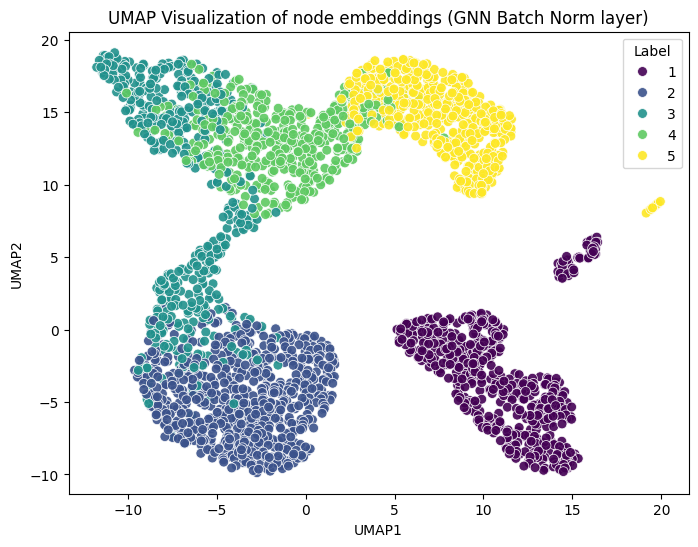

In [33]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN Batch Norm layer)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

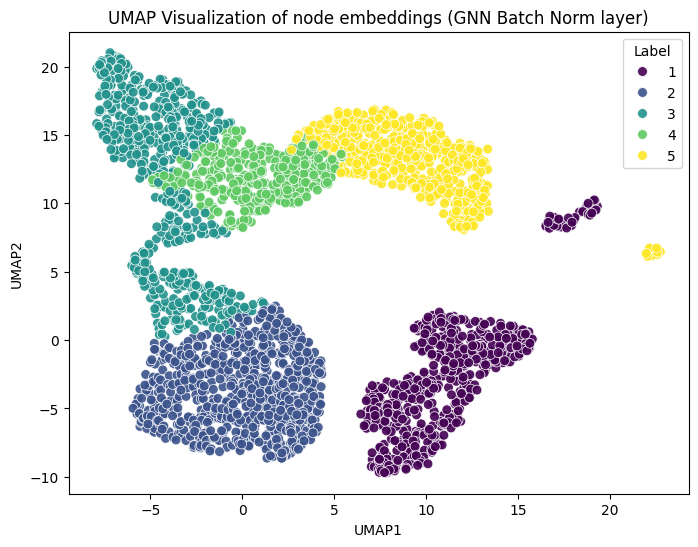

In [34]:
n_neighbors=35 #10 #5
min_dist=0.999 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": pred_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN Batch Norm layer)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}_{}.pdf".format(n_neighbors, min_dist, "pred_labels"))
plt.show()

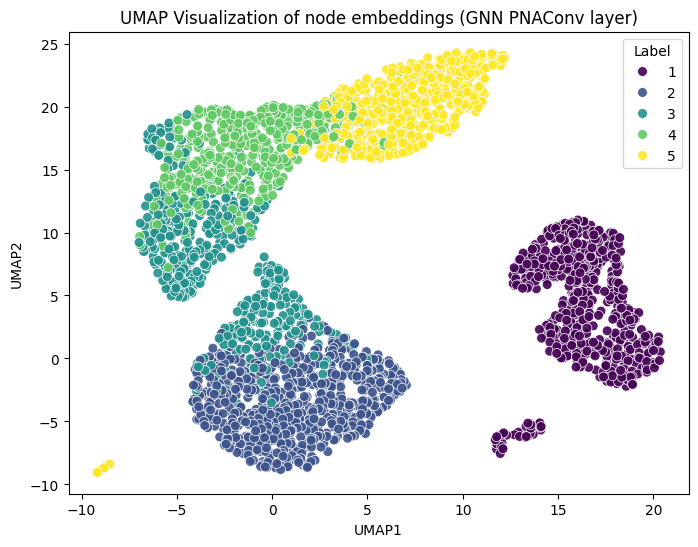

In [35]:
n_neighbors=35 #5
min_dist=0.999 #0.3
metric='correlation'

umap_conv_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_conv_embed[:, 0], "UMAP2": umap_conv_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of node embeddings (GNN PNAConv layer)")
plt.savefig(base_plot_path + "umap_conv_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [36]:
#df_output_gene_rankings = pd.read_csv(base_path + "output_gene_ranking_only_positive_corr", sep="\t", header=None)
#df_output_gene_rankings = df_output_gene_rankings.sort_values(by=[0])
#df_output_gene_rankings.to_csv(base_path + "output_gene_ranking_only_positive_corr_sorted", index=None)
#df_output_gene_rankings

In [37]:
'''probes = dict()
for i, row in df_output_gene_rankings.iterrows():
    r_values = row.values[0].split(" ")
    name = r_values[0]
    p_name = name.split("_")[0]
    if p_name not in probes:
        probes[p_name] = 1
    else:
        probes[p_name] += 1'''

'probes = dict()\nfor i, row in df_output_gene_rankings.iterrows():\n    r_values = row.values[0].split(" ")\n    name = r_values[0]\n    p_name = name.split("_")[0]\n    if p_name not in probes:\n        probes[p_name] = 1\n    else:\n        probes[p_name] += 1'

In [38]:
#dict(sorted(probes.items(), key=lambda item: item[1], reverse=True))

In [39]:
import pandas as pd
import numpy as np

path = "naipu_processed_data/only_positive_corr_data/"
df_test_data = pd.read_csv(path + "df_nebit_dnam_features_test.csv", sep="\t", header=None)
df_test_data

FileNotFoundError: [Errno 2] No such file or directory: 'naipu_processed_data/only_positive_corr_data/df_nebit_dnam_features_test.csv'

In [ ]:
df_f_name_labels = df_test_data.loc[:, 39:]
df_f_name_labels["pred_labels"] = pred_labels
df_f_name_labels.columns = ["labels", "features", "pred_labels"]
df_f_name_labels

In [ ]:
df_seeds = pd.read_csv(path + "seed_features.tsv", sep="\t", header=None)
df_seeds.columns = ["features", "association_scores"]
df_seeds

In [ ]:
pos_likely_pos = df_f_name_labels[df_f_name_labels["labels"].isin([1,2])]
pos_likely_pos

In [ ]:
pos_likely_pos_features = pos_likely_pos["features"].tolist()
df_seeds_as_positive = df_seeds[df_seeds["features"].isin(pos_likely_pos_features)]
df_seeds_as_positive

In [ ]:
np.median(df_seeds_as_positive["association_scores"])

In [ ]:
negative_likely_negative = df_f_name_labels[df_f_name_labels["labels"].isin([3,4,5])]
negative_likely_negative

In [ ]:
negative_likely_negative_features = negative_likely_negative["features"].tolist()
df_seeds_as_negative = df_seeds[df_seeds["features"].isin(negative_likely_negative_features)]
df_seeds_as_negative

In [ ]:
# likely positive
df_likely_positive = df_f_name_labels[df_f_name_labels["pred_labels"].isin([1]) & \
                                      df_f_name_labels["labels"].isin([5])]
df_likely_positive, len(df_likely_positive)

In [ ]:
df_likely_positive_features = df_likely_positive["features"].tolist()
len(df_likely_positive_features), df_likely_positive_features[:5]

In [ ]:
df_seed_features = df_seeds["features"].tolist()
len(df_seed_features), df_seed_features[:5]

In [ ]:
likely_pos_in_seeds = list(set(df_seed_features).intersection(set(df_likely_positive_features)))
len(likely_pos_in_seeds), likely_pos_in_seeds[:5]

In [ ]:
base_path = "../nanodiag_datasets/GSE175758/"
probe_mapper_full = pd.read_csv(base_path + "GPL13534-11288-mapper-HMBC450.txt", sep="\t")
probe_mapper_full

In [ ]:
pb = probe_mapper_full[probe_mapper_full["Name"] == "cg00861824"]

In [ ]:
for item in pb.columns:
    print(item, pb[item])
    print("--")

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_curve, roc_auc_score, \
RocCurveDisplay, average_precision_score, confusion_matrix

plot_local_path = base_plot_path #config["plot_local_path"]
n_edges = 2000000 #config["n_edges"]
n_epo = 3 #config["n_epo"]
classes = [1, 2, 3, 4, 5]
# Calculate confusion matrix
true_labels = df_f_name_labels["labels"].tolist()
predicted_labels = df_f_name_labels["pred_labels"].tolist()
cm = confusion_matrix(true_labels, predicted_labels)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show plot
plt.tight_layout()
#plt.show()
plt.grid(True)
plt.savefig("Confusion_matrix_NPPI_{}_NEpochs_{}.pdf".format(n_edges, n_epo), dpi=200)

In [ ]:
base_path = "naipu_processed_data/only_positive_corr_data/"
df_gene_gene_rel = pd.read_csv(base_path + "out_links_only_positive_corr", sep=" ", header=None)
df_gene_gene_rel

In [ ]:
df_gene_gene_rel[(df_gene_gene_rel.loc[:, 0] == 10841) | (df_gene_gene_rel.loc[:, 1] == 10841)]